In [91]:
import nltk # the natural langauage toolkit, open-source NLP
import pandas as pd # dataframes
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [92]:
### Read our train data into a dataframe
texts = pd.read_csv("train.csv", encoding = 'latin-1')

# look at the first few rows of texts
texts.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [93]:
# read our test data into a dataframe 
test = pd.read_csv("test.csv", encoding = 'latin-1')

# look at the first few rows of test
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [94]:
# split the data by author
byAuthor = texts.groupby("author")

# create empty dictionary to store combined sentences for each author
sentence_dict = {}

# create empty dictionary to store tokenized sentences for each author
token_dict = {}

# for each author...
for name, group in byAuthor:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
   
    # convert everything to lower case (so "The" and "the" get counted as 

#the same word rather than two different words)
    sentences = sentences.lower()
    
    sentence_dict[name] = (sentences)
    
    # split the text into individual tokens (words)  
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    token_dict[name] = (tokens)


In [95]:
# create empty dictionary to populate with average word length by author 
wordlengthByAuthor = {}
stdwordlengthByAuthor = {}

# for each author...
for key, value in token_dict.items():
    
    # characterizing words by different lengths
    small_words = len([w for w in value if len(w) <= 5])
    med_words = len([w for w in value if len(w) > 5 & len(w) <10])
    large_words = len([w for w in value if len(w) > 9 & len(w) <15])
    xlarge_words = len([w for w in value if len(w) > 14 & len(w) <15])
    # Average Word Length for each author
    avg_word_length = np.mean([len(w) for w in value])
    # Std Dev of word length for each author
    std_word_length = np.std([len(w) for w in value])
    
    stdwordlengthByAuthor[key] = ([small_words, med_words, large_words, xlarge_words,std_word_length])
    wordlengthByAuthor[key] = ([small_words, med_words, large_words, xlarge_words,avg_word_length])
    
wordlength_df = pd.DataFrame(wordlengthByAuthor, index = ['small (<5)', 'med (5-9)', 'large (10-14)', 
                                                          'xlarge (14+)', 'avg length'])    
std_wordlength_df = pd.DataFrame(stdwordlengthByAuthor, index = ['small (<5)', 'med (5-9)', 'large (10-14)', 
                                                          'xlarge (14+)', 'std'])
std_wordlength_df


,EAP,HPL,MWS
small (<5),4175.000000,3571.00000,3624.000000
med (5-9),3360.000000,2891.00000,3009.000000
large (10-14),4233.000000,3777.00000,3749.000000
xlarge (14+),2874.000000,2674.00000,2703.000000
std,2.628756,2.55305,2.534958


In [96]:
wordlength_df.head()

,EAP,HPL,MWS
small (<5),4175.000000,3571.000000,3624.00000
med (5-9),3360.000000,2891.000000,3009.00000
large (10-14),4233.000000,3777.000000,3749.00000
xlarge (14+),2874.000000,2674.000000,2703.00000
avg length,3.990554,4.173425,4.04851


In [97]:
# slicing the 'avg length' row from the avg_len_df
avg_len_df = wordlength_df.iloc[4,:]
avg_len_df = pd.DataFrame(avg_len_df)
avg_len_df

,avg length
EAP,3.990554
HPL,4.173425
MWS,4.048510


In [98]:
# slicing the 'std' row from the std_wordlength_df
std_df = std_wordlength_df.iloc[4,:]
std_df = pd.DataFrame(std_df)
std_df

,std
EAP,2.628756
HPL,2.553050
MWS,2.534958


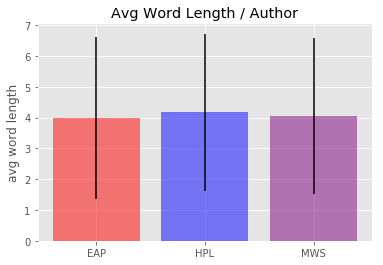

In [99]:
# creating the plots
y_axis = avg_len_df['avg length']
x_axis = np.arange(0,len(y_axis),1)

# setting tick positions and labels
plt.xticks(x_axis,["EAP","HPL","MWS"])
colors=['red','blue','purple']

plot = plt.bar(x_axis,y_axis,yerr=std_df['std'],color=colors,align='center',alpha=0.5)
plt.title("Avg Word Length / Author")
plt.ylabel("avg word length")
plt.show()

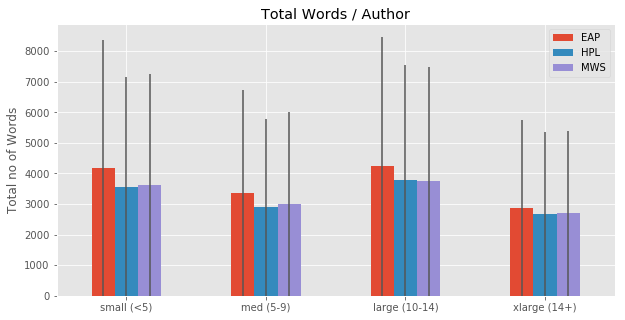

In [100]:
# plotting the words by category for each author with std error bars
wordlength_df = wordlength_df.drop('avg length')
wordlength_df.plot(kind='bar',title = 'Total Words / Author',
                    legend=True , yerr= std_wordlength_df,rot=0, figsize=(10, 5))
plt.ylabel('Total no of Words')
plt.show()